In [31]:
"C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog"
getwd()
###CAR PRICE PREDICTION MODEL USING R PROGRAMMING ###
### ADITYA KUMAR ROY ###

[1] "C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog"

[1] "C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog"

In [ ]:
## adding libraries
library(ggplot2)
library(lubridate)
library(moments)
library(car)
library(lmtest)
library(sandwich)
library(graphics)
library(caret)
library(outliers)
library(fastDummies)
library(Metrics)
library(patchwork)
library(gridExtra)
library(grid)

In [5]:
## Loading the data and Data Preprocessing
setwd("C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog")
Data <- read.csv("car data.csv")
head(Data)
tail(Data)
dim(Data)
summary(Data)
str(Data)
Data$Owner <- as.factor(Data$Owner)
Data$Fuel_Type <- as.factor(Data$Fuel_Type)
Data$Transmission <- as.factor(Data$Transmission)
Data$Selling_type <- as.factor(Data$Selling_type)
str(Data)
summary(Data)
dim(Data)
head(Data)
sum(is.na(Data))   # checking for NA observations


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
,<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>
1,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
2,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
3,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
4,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
5,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
6,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
,<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>
296,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
297,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
298,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
299,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
300,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
301,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


[1] 301   9

   Car_Name              Year      Selling_Price    Present_Price   
 Length:301         Min.   :2003   Min.   : 0.100   Min.   : 0.320  
 Class :character   1st Qu.:2012   1st Qu.: 0.900   1st Qu.: 1.200  
 Mode  :character   Median :2014   Median : 3.600   Median : 6.400  
                    Mean   :2014   Mean   : 4.661   Mean   : 7.628  
                    3rd Qu.:2016   3rd Qu.: 6.000   3rd Qu.: 9.900  
                    Max.   :2018   Max.   :35.000   Max.   :92.600  
   Driven_kms      Fuel_Type         Selling_type       Transmission      
 Min.   :   500   Length:301         Length:301         Length:301        
 1st Qu.: 15000   Class :character   Class :character   Class :character  
 Median : 32000   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 36947                                                           
 3rd Qu.: 48767                                                           
 Max.   :500000                                                    

'data.frame':	301 obs. of  9 variables:
 $ Car_Name     : chr  "ritz" "sx4" "ciaz" "wagon r" ...
 $ Year         : int  2014 2013 2017 2011 2014 2018 2015 2015 2016 2015 ...
 $ Selling_Price: num  3.35 4.75 7.25 2.85 4.6 9.25 6.75 6.5 8.75 7.45 ...
 $ Present_Price: num  5.59 9.54 9.85 4.15 6.87 9.83 8.12 8.61 8.89 8.92 ...
 $ Driven_kms   : int  27000 43000 6900 5200 42450 2071 18796 33429 20273 42367 ...
 $ Fuel_Type    : chr  "Petrol" "Diesel" "Petrol" "Petrol" ...
 $ Selling_type : chr  "Dealer" "Dealer" "Dealer" "Dealer" ...
 $ Transmission : chr  "Manual" "Manual" "Manual" "Manual" ...
 $ Owner        : int  0 0 0 0 0 0 0 0 0 0 ...
'data.frame':	301 obs. of  9 variables:
 $ Car_Name     : chr  "ritz" "sx4" "ciaz" "wagon r" ...
 $ Year         : int  2014 2013 2017 2011 2014 2018 2015 2015 2016 2015 ...
 $ Selling_Price: num  3.35 4.75 7.25 2.85 4.6 9.25 6.75 6.5 8.75 7.45 ...
 $ Present_Price: num  5.59 9.54 9.85 4.15 6.87 9.83 8.12 8.61 8.89 8.92 ...
 $ Driven_kms   : int  27000

   Car_Name              Year      Selling_Price    Present_Price   
 Length:301         Min.   :2003   Min.   : 0.100   Min.   : 0.320  
 Class :character   1st Qu.:2012   1st Qu.: 0.900   1st Qu.: 1.200  
 Mode  :character   Median :2014   Median : 3.600   Median : 6.400  
                    Mean   :2014   Mean   : 4.661   Mean   : 7.628  
                    3rd Qu.:2016   3rd Qu.: 6.000   3rd Qu.: 9.900  
                    Max.   :2018   Max.   :35.000   Max.   :92.600  
   Driven_kms      Fuel_Type       Selling_type    Transmission Owner  
 Min.   :   500   CNG   :  2   Dealer    :195   Automatic: 40   0:290  
 1st Qu.: 15000   Diesel: 60   Individual:106   Manual   :261   1: 10  
 Median : 32000   Petrol:239                                    3:  1  
 Mean   : 36947                                                        
 3rd Qu.: 48767                                                        
 Max.   :500000                                                        

[1] 301   9

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
,<chr>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
1,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
2,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
3,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
4,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
5,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
6,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


[1] 0

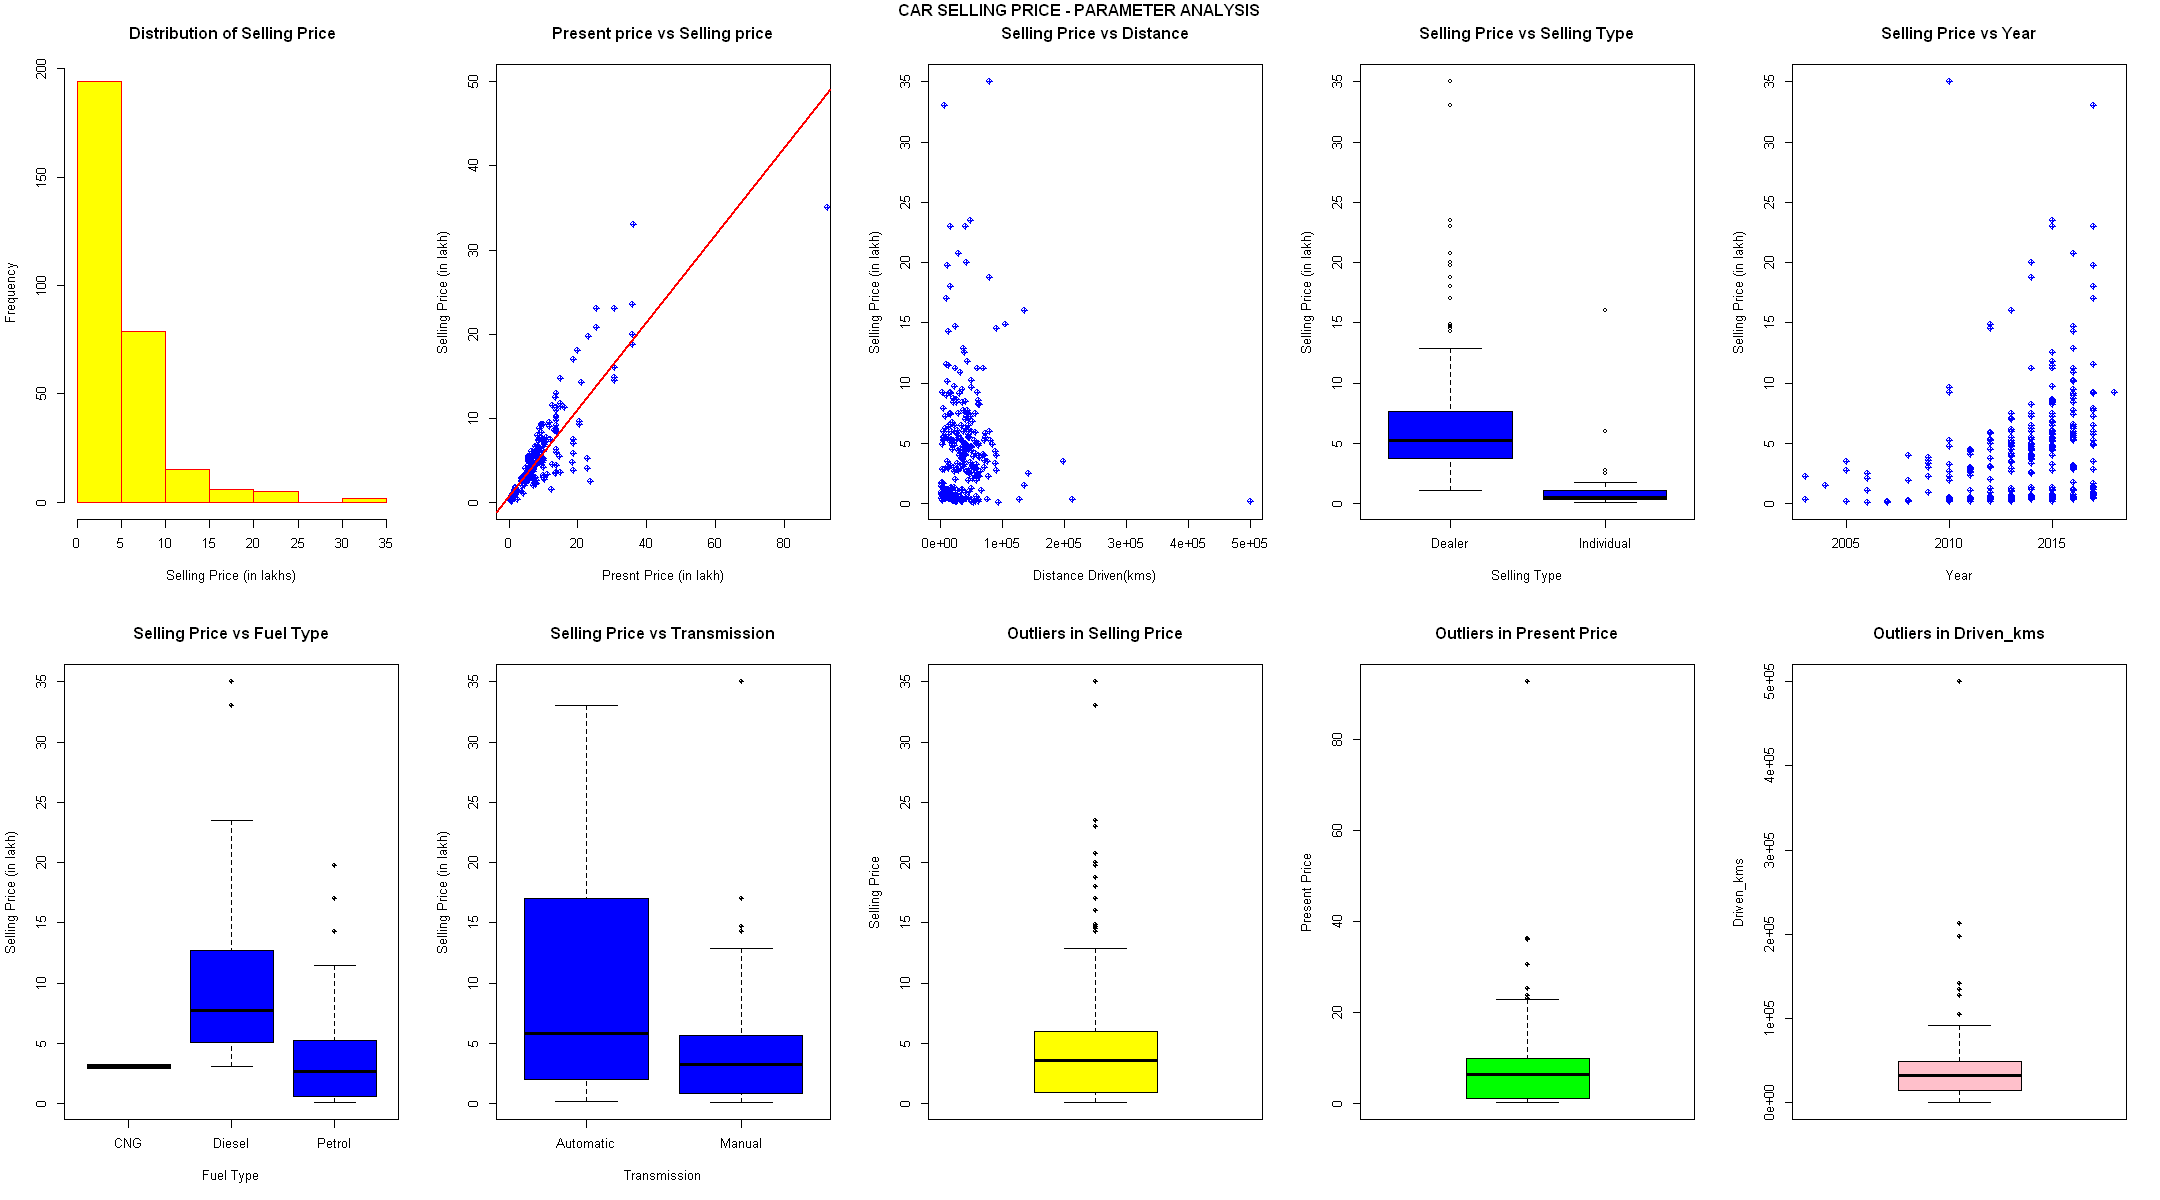

In [10]:
## Exploratory Data Analysis

library(repr)
# Set the size of the plotting window
options(repr.plot.width = 18, repr.plot.height = 10)

par(mfrow = c(2,5))

# Distribution of Selling Price
hist(x = Data$Selling_Price,main = " Distribution of Selling Price",
     col = "yellow",border = "red", xlab = "Selling Price (in lakhs)")

# Plot between Selling price and Present price
plot(x = Data$Present_Price,y = Data$Selling_Price,type = "p",
     col = "blue",main = "Present price vs Selling price",
     xlab = "Presnt Price (in lakh)",ylab = "Selling Price (in lakh)",
     xlim = c(0,90),ylim = c(0,50),pch = 10)
abline(lm(Selling_Price ~ Present_Price, data = Data), col = "red", lwd = 2)

# Plot between Selling Price and Distance Driven
plot(x = Data$Driven_kms ,y = Data$Selling_Price,type = "p",
     col = "blue",main = "Selling Price vs Distance",
     xlab = "Distance Driven(kms)",ylab = "Selling Price (in lakh)",pch = 10)

# Variation of selling price with selling type
plot(x = Data$Selling_type ,y = Data$Selling_Price,type = "p",
     col = "blue",main = "Selling Price vs Selling Type",
     xlab = "Selling Type",ylab = "Selling Price (in lakh)")

# Variation of Selling Price with Year
plot(x = Data$Year ,y = Data$Selling_Price,type = "p",
     col = "blue",main = "Selling Price vs Year",
     xlab = "Year",ylab = "Selling Price (in lakh)",pch = 10)

# Variation of Selling Price with Fuel Type
plot(x = Data$Fuel_Type ,y = Data$Selling_Price,type = "p",
     col = "blue",main = "Selling Price vs Fuel Type",
     xlab = "Fuel Type",ylab = "Selling Price (in lakh)",pch = 10)

# Variation of Selling Price with Mode of transmission
plot(x = Data$Transmission ,y = Data$Selling_Price,type = "p",
     col = "blue",main = "Selling Price vs Transmission",
     xlab = "Transmission",ylab = "Selling Price (in lakh)",pch = 10)

#Checking for outliers in Selling Price
boxplot(x = Data$Selling_Price,main = "Outliers in Selling Price",
        ylab = "Selling Price",col = "yellow",pch = 10)

#checking for outliers in Present Price
boxplot(x = Data$Present_Price,main = "Outliers in Present Price",
        ylab = "Present Price",col = "green",pch = 10)

# checking for outliers in Driven distance
boxplot(x = Data$Driven_kms,main = "Outliers in Driven_kms",
        ylab = "Driven_kms",col = "pink",pch = 10)

title(main = "CAR SELLING PRICE - PARAMETER ANALYSIS",outer = TRUE,line = -1)


In [12]:
##Data Wrangling

#numeric feature matrix  for Data 1 & 2
Num_features<- data.frame(Data$Selling_Price,Data$Present_Price,
                          Data$Driven_kms,Data$Year)
colnames(Num_features) <- c("Selling","Present","Distance","Year")
head(Num_features)  
cor_matrix<- cor(Num_features)
cor_matrix

#Cleaned matrix excludes outliers
remove_outliers_iqr_all_columns <- function(df) {
  for (col in names(df)) {
    if (is.numeric(df[[col]])) {
      Q1 <- quantile(df[[col]], 0.25)
      Q3 <- quantile(df[[col]], 0.75)
      IQR <- Q3 - Q1
      lower_bound <- Q1 - 1.5 * IQR
      upper_bound <- Q3 + 1.5 * IQR
      df <- df[df[[col]] >= lower_bound & df[[col]] <= upper_bound, ]
    }
  }
  return(df)
}
cleaned_data <- remove_outliers_iqr_all_columns(Data)
summary(cleaned_data)

,Selling,Present,Distance,Year
,<dbl>,<dbl>,<int>,<int>
1,3.35,5.59,27000,2014
2,4.75,9.54,43000,2013
3,7.25,9.85,6900,2017
4,2.85,4.15,5200,2011
5,4.60,6.87,42450,2014
6,9.25,9.83,2071,2018


,Selling,Present,Distance,Year
Selling,1.00000000,0.87891441,0.02918709,0.23614098
Present,0.87891441,1.00000000,0.20361775,-0.04719249
Distance,0.02918709,0.20361775,1.00000000,-0.52434204
Year,0.23614098,-0.04719249,-0.52434204,1.00000000


   Car_Name              Year      Selling_Price    Present_Price  
 Length:271         Min.   :2006   Min.   : 0.120   Min.   : 0.32  
 Class :character   1st Qu.:2013   1st Qu.: 0.765   1st Qu.: 1.02  
 Mode  :character   Median :2015   Median : 3.350   Median : 5.80  
                    Mean   :2014   Mean   : 3.792   Mean   : 6.00  
                    3rd Qu.:2016   3rd Qu.: 5.750   3rd Qu.: 9.40  
                    Max.   :2018   Max.   :12.900   Max.   :20.45  
   Driven_kms     Fuel_Type       Selling_type    Transmission Owner  
 Min.   :  500   CNG   :  2   Dealer    :173   Automatic: 22   0:261  
 1st Qu.:15000   Diesel: 45   Individual: 98   Manual   :249   1: 10  
 Median :30000   Petrol:224                                    3:  0  
 Mean   :31333                                                        
 3rd Qu.:45000                                                        
 Max.   :88000                                                        

In [13]:
#cleaned feature matrix  for Data 3
cleaned_num_features <- data.frame(cleaned_data$Selling_Price,
                                   cleaned_data$Present_Price,
                                   cleaned_data$Driven_kms,
                                   cleaned_data$Year)
colnames(cleaned_num_features)<-c("C_Selling","C_Present","C_Distance",
                                  "C_Year")
head(cleaned_num_features)
clean_cor_matrix <- cor(cleaned_num_features)
clean_cor_matrix

,C_Selling,C_Present,C_Distance,C_Year
,<dbl>,<dbl>,<int>,<int>
1,3.35,5.59,27000,2014
2,4.75,9.54,43000,2013
3,7.25,9.85,6900,2017
4,2.85,4.15,5200,2011
5,4.60,6.87,42450,2014
6,9.25,9.83,2071,2018


,C_Selling,C_Present,C_Distance,C_Year
C_Selling,1.0000000,0.86880742,0.1945060,0.26042629
C_Present,0.8688074,1.00000000,0.4341161,-0.04074687
C_Distance,0.1945060,0.43411611,1.0000000,-0.53358931
C_Year,0.2604263,-0.04074687,-0.5335893,1.00000000


In [15]:
# Since owner Transmission and Fuel type are highly imbalanced # for Data 4

Data_Cleaned <- cbind.data.frame(Data$Car_Name,Data$Year,Data$Selling_Price,
                                 Data$Present_Price,Data$Driven_kms,Data$Selling_type)

colnames(Data_Cleaned) <- c("Car","Year","Sell","Pres","Driven","SellType")
head(Data_Cleaned)
Data_Cleaned$SellType<- ifelse(Data_Cleaned$SellType == "Dealer",1,0)
head(Data_Cleaned)
str(Data_Cleaned)
#for encoding the categorical variables
library(fastDummies)
Data_encoded <- dummy_cols(Data_Cleaned,remove_first_dummy = TRUE)
head(Data_encoded)
summary(Data_encoded)

,Car,Year,Sell,Pres,Driven,SellType
,<chr>,<int>,<dbl>,<dbl>,<int>,<fct>
1,ritz,2014,3.35,5.59,27000,Dealer
2,sx4,2013,4.75,9.54,43000,Dealer
3,ciaz,2017,7.25,9.85,6900,Dealer
4,wagon r,2011,2.85,4.15,5200,Dealer
5,swift,2014,4.60,6.87,42450,Dealer
6,vitara brezza,2018,9.25,9.83,2071,Dealer


,Car,Year,Sell,Pres,Driven,SellType
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,ritz,2014,3.35,5.59,27000,1
2,sx4,2013,4.75,9.54,43000,1
3,ciaz,2017,7.25,9.85,6900,1
4,wagon r,2011,2.85,4.15,5200,1
5,swift,2014,4.60,6.87,42450,1
6,vitara brezza,2018,9.25,9.83,2071,1


'data.frame':	301 obs. of  6 variables:
 $ Car     : chr  "ritz" "sx4" "ciaz" "wagon r" ...
 $ Year    : int  2014 2013 2017 2011 2014 2018 2015 2015 2016 2015 ...
 $ Sell    : num  3.35 4.75 7.25 2.85 4.6 9.25 6.75 6.5 8.75 7.45 ...
 $ Pres    : num  5.59 9.54 9.85 4.15 6.87 9.83 8.12 8.61 8.89 8.92 ...
 $ Driven  : int  27000 43000 6900 5200 42450 2071 18796 33429 20273 42367 ...
 $ SellType: num  1 1 1 1 1 1 1 1 1 1 ...


,Car,Year,Sell,Pres,Driven,SellType,Car_Activa 3g,Car_Activa 4g,Car_alto 800,Car_alto k10,⋯,Car_UM Renegade Mojave,Car_verna,Car_vitara brezza,Car_wagon r,Car_xcent,Car_Yamaha Fazer,Car_Yamaha FZ v 2.0,Car_Yamaha FZ 16,Car_Yamaha FZ S,Car_Yamaha FZ S V 2.0
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ritz,2014,3.35,5.59,27000,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,sx4,2013,4.75,9.54,43000,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,ciaz,2017,7.25,9.85,6900,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,wagon r,2011,2.85,4.15,5200,1,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
5,swift,2014,4.60,6.87,42450,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,vitara brezza,2018,9.25,9.83,2071,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0


     Car                 Year           Sell             Pres       
 Length:301         Min.   :2003   Min.   : 0.100   Min.   : 0.320  
 Class :character   1st Qu.:2012   1st Qu.: 0.900   1st Qu.: 1.200  
 Mode  :character   Median :2014   Median : 3.600   Median : 6.400  
                    Mean   :2014   Mean   : 4.661   Mean   : 7.628  
                    3rd Qu.:2016   3rd Qu.: 6.000   3rd Qu.: 9.900  
                    Max.   :2018   Max.   :35.000   Max.   :92.600  
     Driven          SellType      Car_Activa 3g      Car_Activa 4g     
 Min.   :   500   Min.   :0.0000   Min.   :0.000000   Min.   :0.000000  
 1st Qu.: 15000   1st Qu.:0.0000   1st Qu.:0.000000   1st Qu.:0.000000  
 Median : 32000   Median :1.0000   Median :0.000000   Median :0.000000  
 Mean   : 36947   Mean   :0.6478   Mean   :0.006645   Mean   :0.003322  
 3rd Qu.: 48767   3rd Qu.:1.0000   3rd Qu.:0.000000   3rd Qu.:0.000000  
 Max.   :500000   Max.   :1.0000   Max.   :1.000000   Max.   :1.000000  
  Car_

In [17]:
#Same with cleaned data from outliers   for Data 5
summary(cleaned_data)
outlier_Data_Cleaned <- cbind.data.frame(cleaned_data$Car_Name,cleaned_data$Year,
                                         cleaned_data$Selling_Price,
                                         cleaned_data$Present_Price,
                                         cleaned_data$Driven_kms,cleaned_data$Selling_type)

colnames(outlier_Data_Cleaned) <- c("OC_Car","OC_Year","OC_Sell",
                                    "OC_Pres","OC_Driven","OC_SellType")
head(outlier_Data_Cleaned)
outlier_Data_Cleaned$OC_SellType<- ifelse(outlier_Data_Cleaned$OC_SellType == "Dealer",1,0)
head(outlier_Data_Cleaned)
str(outlier_Data_Cleaned)
#for encoding the categorical variables
library(fastDummies)
OC_Data_encoded <- dummy_cols(outlier_Data_Cleaned,remove_first_dummy = TRUE)
head(OC_Data_encoded)
summary(OC_Data_encoded)

   Car_Name              Year      Selling_Price    Present_Price  
 Length:271         Min.   :2006   Min.   : 0.120   Min.   : 0.32  
 Class :character   1st Qu.:2013   1st Qu.: 0.765   1st Qu.: 1.02  
 Mode  :character   Median :2015   Median : 3.350   Median : 5.80  
                    Mean   :2014   Mean   : 3.792   Mean   : 6.00  
                    3rd Qu.:2016   3rd Qu.: 5.750   3rd Qu.: 9.40  
                    Max.   :2018   Max.   :12.900   Max.   :20.45  
   Driven_kms     Fuel_Type       Selling_type    Transmission Owner  
 Min.   :  500   CNG   :  2   Dealer    :173   Automatic: 22   0:261  
 1st Qu.:15000   Diesel: 45   Individual: 98   Manual   :249   1: 10  
 Median :30000   Petrol:224                                    3:  0  
 Mean   :31333                                                        
 3rd Qu.:45000                                                        
 Max.   :88000                                                        

,OC_Car,OC_Year,OC_Sell,OC_Pres,OC_Driven,OC_SellType
,<chr>,<int>,<dbl>,<dbl>,<int>,<fct>
1,ritz,2014,3.35,5.59,27000,Dealer
2,sx4,2013,4.75,9.54,43000,Dealer
3,ciaz,2017,7.25,9.85,6900,Dealer
4,wagon r,2011,2.85,4.15,5200,Dealer
5,swift,2014,4.60,6.87,42450,Dealer
6,vitara brezza,2018,9.25,9.83,2071,Dealer


,OC_Car,OC_Year,OC_Sell,OC_Pres,OC_Driven,OC_SellType
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,ritz,2014,3.35,5.59,27000,1
2,sx4,2013,4.75,9.54,43000,1
3,ciaz,2017,7.25,9.85,6900,1
4,wagon r,2011,2.85,4.15,5200,1
5,swift,2014,4.60,6.87,42450,1
6,vitara brezza,2018,9.25,9.83,2071,1


'data.frame':	271 obs. of  6 variables:
 $ OC_Car     : chr  "ritz" "sx4" "ciaz" "wagon r" ...
 $ OC_Year    : int  2014 2013 2017 2011 2014 2018 2015 2015 2016 2015 ...
 $ OC_Sell    : num  3.35 4.75 7.25 2.85 4.6 9.25 6.75 6.5 8.75 7.45 ...
 $ OC_Pres    : num  5.59 9.54 9.85 4.15 6.87 9.83 8.12 8.61 8.89 8.92 ...
 $ OC_Driven  : int  27000 43000 6900 5200 42450 2071 18796 33429 20273 42367 ...
 $ OC_SellType: num  1 1 1 1 1 1 1 1 1 1 ...


,OC_Car,OC_Year,OC_Sell,OC_Pres,OC_Driven,OC_SellType,OC_Car_Activa 4g,OC_Car_alto 800,OC_Car_alto k10,OC_Car_amaze,⋯,OC_Car_UM Renegade Mojave,OC_Car_verna,OC_Car_vitara brezza,OC_Car_wagon r,OC_Car_xcent,OC_Car_Yamaha Fazer,OC_Car_Yamaha FZ v 2.0,OC_Car_Yamaha FZ 16,OC_Car_Yamaha FZ S,OC_Car_Yamaha FZ S V 2.0
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ritz,2014,3.35,5.59,27000,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,sx4,2013,4.75,9.54,43000,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,ciaz,2017,7.25,9.85,6900,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,wagon r,2011,2.85,4.15,5200,1,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
5,swift,2014,4.60,6.87,42450,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,vitara brezza,2018,9.25,9.83,2071,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0


    OC_Car             OC_Year        OC_Sell          OC_Pres     
 Length:271         Min.   :2006   Min.   : 0.120   Min.   : 0.32  
 Class :character   1st Qu.:2013   1st Qu.: 0.765   1st Qu.: 1.02  
 Mode  :character   Median :2015   Median : 3.350   Median : 5.80  
                    Mean   :2014   Mean   : 3.792   Mean   : 6.00  
                    3rd Qu.:2016   3rd Qu.: 5.750   3rd Qu.: 9.40  
                    Max.   :2018   Max.   :12.900   Max.   :20.45  
   OC_Driven      OC_SellType     OC_Car_Activa 4g  OC_Car_alto 800  
 Min.   :  500   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:15000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :30000   Median :1.0000   Median :0.00000   Median :0.00000  
 Mean   :31333   Mean   :0.6384   Mean   :0.00369   Mean   :0.00369  
 3rd Qu.:45000   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :88000   Max.   :1.0000   Max.   :1.00000   Max.   :1.00000  
 OC_Car_alto k10    OC_Car_amaze  

In [18]:
## Partitioning Train and Test Datasets

# Data 1 : includes outliers and has present price,year and distance as regressors
# Data 2: excludes outliers and has present price,year  as regressors
index1 <- sample(1:nrow(Num_features),
                 as.integer(0.8*nrow(Num_features)))
Train1 <- Num_features[index1,]
Test1 <- Num_features[-index1,]

# Data 3: excludes outliers and has present price,year and distance as regressors
index2 <- sample(1:nrow(cleaned_num_features),
                 as.integer(0.8*nrow(cleaned_num_features)))
Train2 <- cleaned_num_features[index2,]
Test2 <- cleaned_num_features[-index2,]

# Data 4: includes all significant features
index <- sample(1:nrow(Data_encoded),
                as.integer(0.8*nrow(Data_encoded)))
Train <- Data_encoded[index,]
Test <- Data_encoded[-index,]

# Data 5 : outlier excluded ,including all significant features
OC_index <- sample(1:nrow(OC_Data_encoded),
                   as.integer(0.8*nrow(OC_Data_encoded)))
OC_Train <- OC_Data_encoded[OC_index,]
OC_Test <- OC_Data_encoded[-OC_index,]


In [20]:
##Training a regression model

#model1
model1 <- lm(Selling~ ., data = Train1)

#model2
model2 <- lm(Selling ~ Present+Year,data = Train1)

# model3
model3 <- lm(C_Selling~ . ,data = Train2)

#model4
model4 <- lm(Sell ~ . ,data = Data_encoded)

#model5
model5 <- lm(OC_Sell ~ . ,data = OC_Data_encoded)


In [21]:
##Making Predictions Using Model

pred1<- predict(model1,newdata = Test1)

pred2<-predict(model2,newdata = Test1)

pred3<-predict(model3,newdata = Test2)

pred4 <- predict(model4,newdata = Test)

pred5 <- predict(model5,newdata = OC_Test)


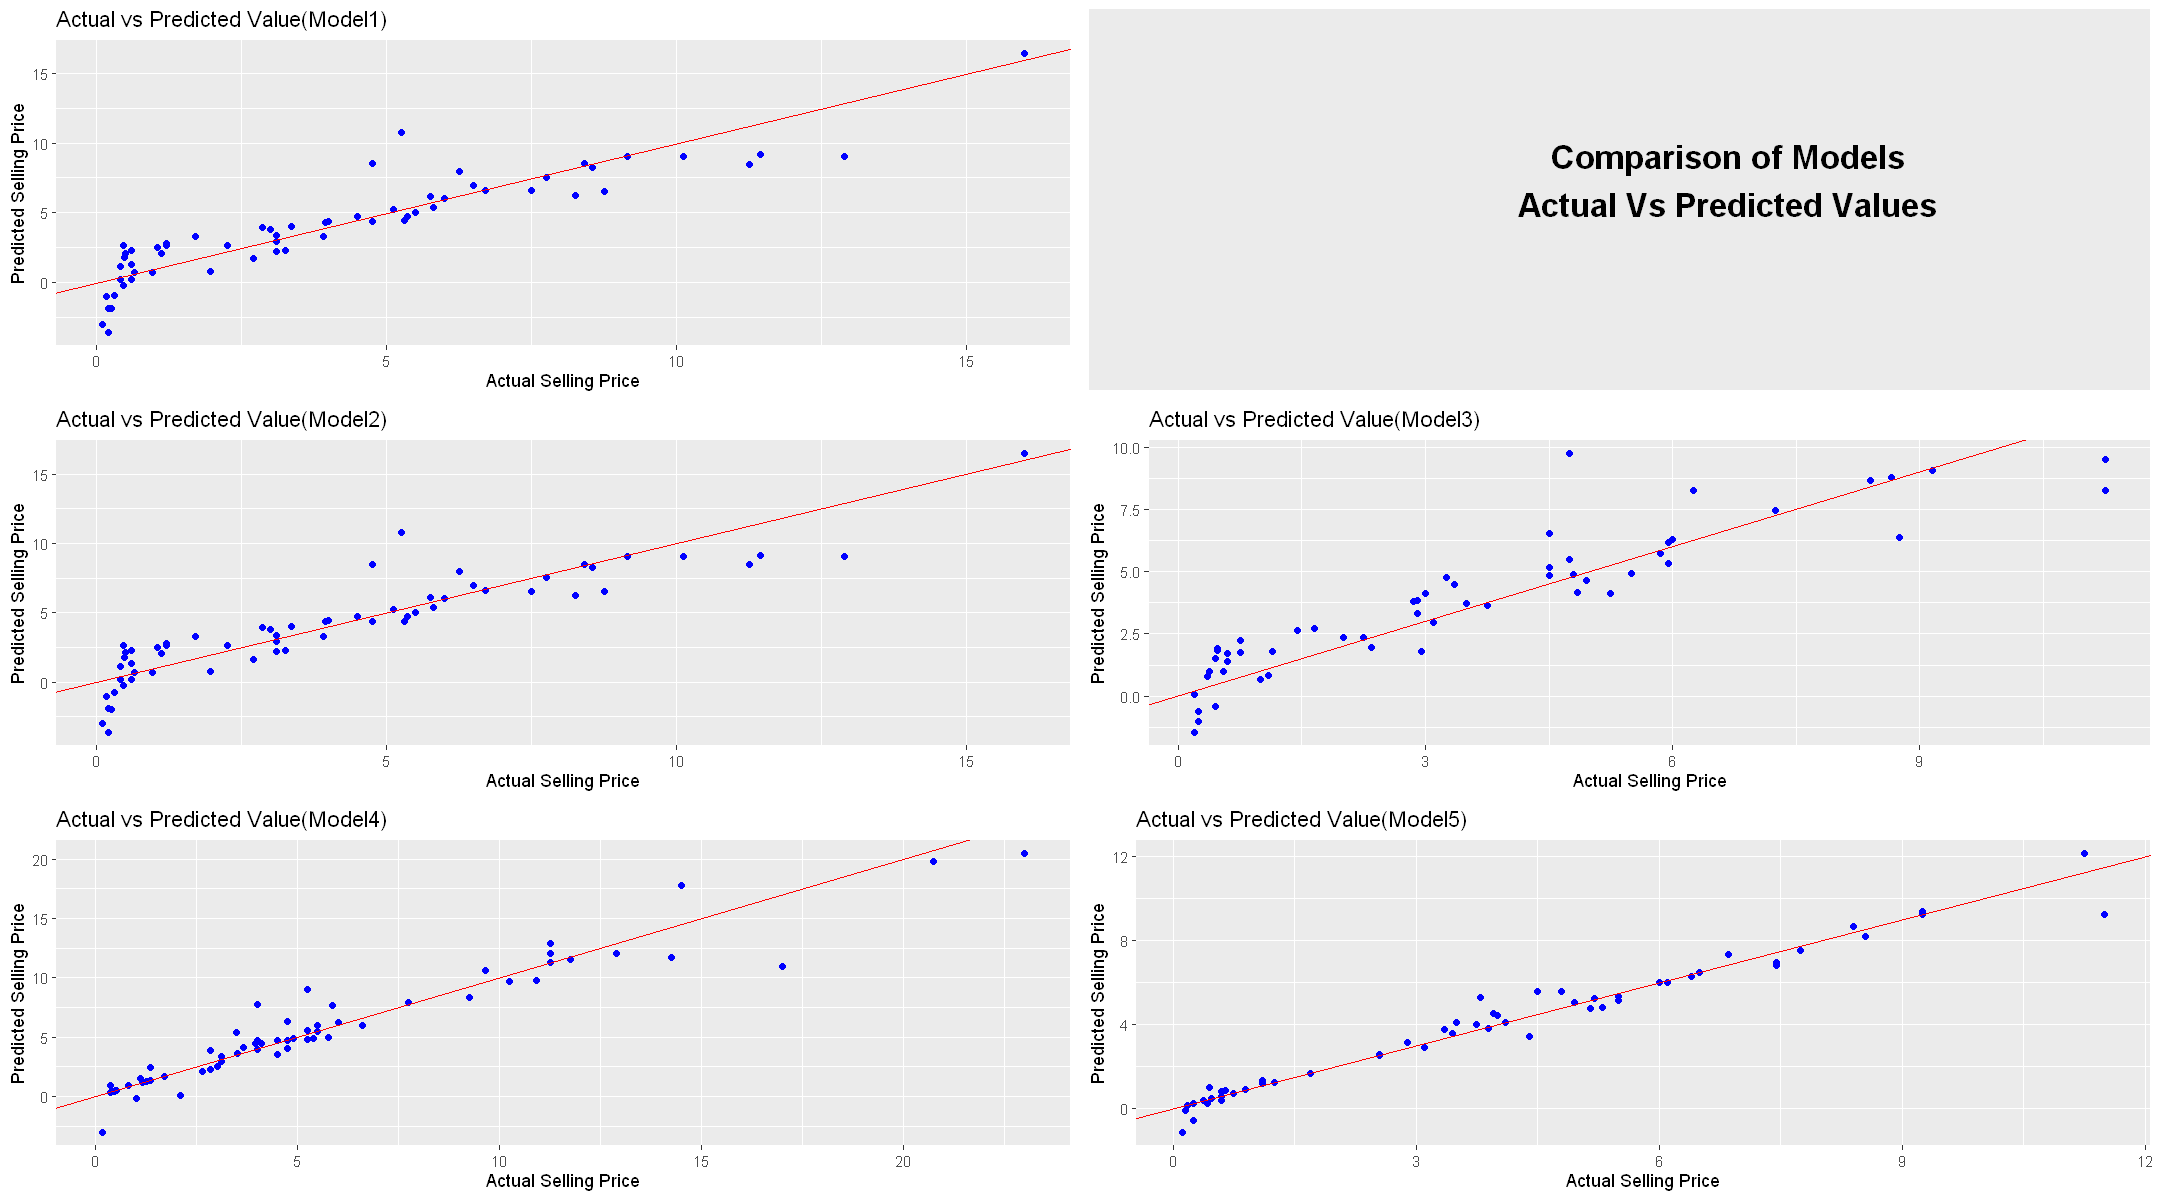

In [22]:
## Model Performance
library(gridExtra)
library(grid)
library(ggplot2)
library(repr)
# Set the size of the plotting window
options(repr.plot.width = 18, repr.plot.height = 10)
# Plotting Actual vs Predicted
plot1 <- ggplot()+
geom_point(aes(x = Test1$Selling,y = pred1),col = "blue")+
  geom_abline(slope = 1, intercept = 0, col = "red")+
  labs(title = "Actual vs Predicted Value(Model1)",x = "Actual Selling Price",
       y = "Predicted Selling Price")

plotx<-ggplot()

plot2 <- ggplot()+
geom_point(aes(x = Test1$Selling,y = pred2),col = "blue")+
  geom_abline(slope = 1, intercept = 0, col = "red")+
  labs(title = "Actual vs Predicted Value(Model2)",x = "Actual Selling Price",
       y = "Predicted Selling Price")

plot3 <- ggplot()+
  geom_point(aes(x = Test2$C_Selling,y = pred3),col = "blue")+
  geom_abline(slope = 1, intercept = 0, col = "red")+
  labs(title = "Actual vs Predicted Value(Model3)",x = "Actual Selling Price",
       y = "Predicted Selling Price")

plot4 <- ggplot()+
  geom_point(aes(x = Test$Sell,y = pred4),col = "blue")+
  geom_abline(slope = 1, intercept = 0, col = "red")+
  labs(title = "Actual vs Predicted Value(Model4)",x = "Actual Selling Price",
       y = "Predicted Selling Price")

plot5 <- ggplot()+
  geom_point(aes(x = OC_Test$OC_Sell,y = pred5),col = "blue")+
  geom_abline(slope = 1, intercept = 0, col = "red")+
  labs(title = "Actual vs Predicted Value(Model5)",x = "Actual Selling Price",
       y = "Predicted Selling Price")

grid.arrange(plot1,plotx,plot2, plot3, plot4, plot5, nrow = 3, ncol = 2)
grid.text("Comparison of Models\nActual Vs Predicted Values", 
          x = 0.8, y = 0.85, gp = gpar(fontsize = 20, fontface = "bold"))


In [27]:
### Cost or Error Function

# BIAS
library(Metrics)
B1<-bias(Test1$Selling,pred1)
B2<-bias(Test1$Selling,pred2)
B3<-bias(Test2$C_Selling,pred3)
B4<-bias(Test$Sell,pred4)
B5<-bias(OC_Test$OC_Sell,pred5)

# RMSE
rmse1 <- sqrt(mean((pred1 - Test1$Selling)^2))
rmse2 <- sqrt(mean((pred2 - Test1$Selling)^2))
rmse3 <- sqrt(mean((pred3 - Test2$C_Selling)^2))
rmse4 <- sqrt(mean((pred4 - Test$Sell)^2))
rmse5 <- sqrt(mean((pred5 - OC_Test$OC_Sell)^2))

# MSE
mse1 <- (mean((pred1 - Test1$Selling)^2))
mse2 <- (mean((pred2 - Test1$Selling)^2))
mse3 <- (mean((pred3 - Test2$C_Selling)^2))
mse4 <- (mean((pred4 - Test$Sell)^2))
mse5 <- (mean((pred5 - OC_Test$OC_Sell)^2))

# MAE
mae1 <- mean(abs(pred1 - Test1$Selling))
mae2 <- mean(abs(pred2 - Test1$Selling))
mae3 <- mean(abs(pred3 - Test2$C_Selling))
mae4 <- mean(abs(pred4 - Test$Sell))
mae5 <- mean(abs(pred5 - OC_Test$OC_Sell))

# Correlation between the Actual and Predicted value
cor1<-cor(pred1,Test1$Selling)
cor2<-cor(pred2,Test1$Selling)
cor3<-cor(pred3,Test2$C_Selling)
cor4<-cor(pred4,Test$Sell)
cor5<-cor(pred5,OC_Test$OC_Sell)

# R - Squared Value
library(caret)
r1 <- R2(pred1,Test1$Selling)
r2 <- R2(pred2,Test1$Selling)
r3 <- R2(pred3,Test2$C_Selling)
r4 <- R2(pred4,Test$Sell)
r5 <- R2(pred5,OC_Test$OC_Sell)

In [28]:
# Comparison between model error and cost function
comparison_metrics <- data.frame(
  Model = c("Model1","Model2","Model3","Model4","Model5"),
  Bias = c(B1, B2, B3, B4,B5),
  RMSE = c(rmse1, rmse2, rmse3, rmse4,rmse5),
  MSE = c(mse1, mse2, mse3, mse4,mse5),
  MAE = c(mae1, mae2, mae3, mae4,mae5),
  Correlation = c(cor1, cor2, cor3, cor4,cor5),
  R_Squared = c(r1,r2,r3,r4,r5)
)
print(comparison_metrics)



   Model         Bias      RMSE       MSE       MAE Correlation R_Squared
1 Model1  0.094973425 1.5973008 2.5513699 1.1561236   0.9044706 0.8180671
2 Model2  0.094693381 1.5986110 2.5555571 1.1593375   0.9045801 0.8182652
3 Model3 -0.244154855 1.2243833 1.4991146 0.8914595   0.9126484 0.8329270
4 Model4  0.020697010 1.4578087 2.1252062 0.8926753   0.9564615 0.9148187
5 Model5 -0.004638167 0.5485788 0.3009387 0.3422287   0.9836248 0.9675177


In [29]:
##### Conclusion #####
##Hence model4 is the best fit since it is giving good 
##performance even though the it includes outliers.
## if the effect outliers is excluded then model5 is best fit.
